In [1]:
!python --version

Python 3.10.13


In [2]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.7 MB/s eta 0:00:00


In [3]:
!pip install split-folders

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import splitfolders

import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import pennylane as qml
from pennylane.templates import RandomLayers
import numpy as np

import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2024-04-21 06:52:08.275694: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 06:52:08.275827: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 06:52:08.430871: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
img_height,img_width=256,256

batch_size=32

# Data Preparation

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import pennylane as qml
from pennylane.templates import RandomLayers
import numpy as np

import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [7]:
def split_data(data_path, output_path):
    # Split data into train and validation directories
    splitfolders.ratio(data_path, output=output_path, seed=42, ratio=(0.8, 0.2))
    train_data_dir = output_path + '/train'
    val_data_dir = output_path + '/val'
    
    # Define image dimensions and batch size
    img_height, img_width = 256, 256
    batch_size = 32
    
    # Data augmentation
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=45,
        horizontal_flip=True,
        vertical_flip=True,
        rescale=1./255
    )
    
    # Load and augment training data
    train_ds = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical' # or 'binary' if it's binary classification
    )
    
    # Load validation data without augmentation
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    val_ds = val_datagen.flow_from_directory(
        val_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical' # or 'binary' if it's binary classification
    )
    
    return train_ds, val_ds

3064 files successfully saved


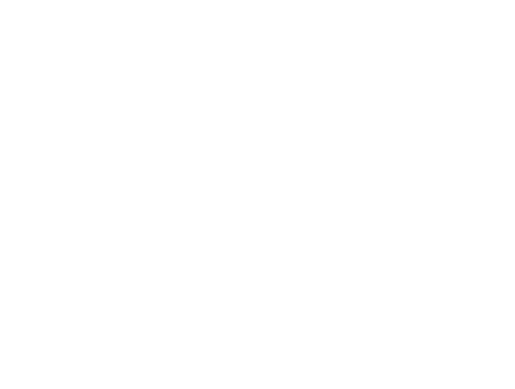

In [8]:
import os
import PIL
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import h5py
!pip install split-folders
import splitfolders
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
os.mkdir("/kaggle/working/bt_images")
os.mkdir("/kaggle/working/bt_images/1")
os.mkdir("/kaggle/working/bt_images/2")
os.mkdir("/kaggle/working/bt_images/3")
labels=[]
border=[]
filename = None

for filename in range(1, 3065):
  with h5py.File('/kaggle/input/figshare-brain-tumor-dataset/dataset/data/{}.mat'.format(filename), 'r') as f:
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
     
     
      labels.append(int(label))
      img = np.array(img, dtype=np.float32)
      
      plt.axis('off')
      
      plt.imsave("/kaggle/working/bt_images/{}/{}.jpg".format(str(int(label)),filename), img, cmap='gray')
      
      
print("{} files successfully saved".format(filename))
 

In [9]:
train_ds1, val_ds1 = split_data('/kaggle/working/bt_images', '/kaggle/working/output')

Copying files: 3064 files [00:00, 6567.54 files/s]


Found 2450 images belonging to 3 classes.
Found 614 images belonging to 3 classes.


In [10]:
# class_names = train_ds1.class_names
# print(class_names)

In [11]:
# class_names = val_ds1.class_names
# print(class_names)

In [12]:
!nvidia-smi

Sun Apr 21 06:53:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# MODEL TRAINING


In [13]:
# tf.keras.backend.set_floatx('float32')

## QUANTUM PART

In [14]:
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [15]:
n_layers = 3
weight_shapes = {"weights": (n_layers, n_qubits)}

In [16]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

## CLASSICAL PART

In [17]:
INPUT = (256,256,3)

In [18]:
def show_results(pretrained_model, epochs, lr, train_ds, val_ds):
    model = Sequential()

    for layer in pretrained_model.layers:
            layer.trainable=False

    model.add(pretrained_model)
    model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
    model.add(Dense(128, activation='relu'))
#     model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
#     model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(qlayer)
    model.add(Dense(3, activation='softmax'))
    
    
    model.summary()
    
    
    model.compile(optimizer=Adam(lr),loss='categorical_crossentropy',metrics=['accuracy'])

    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs
    )
    import matplotlib.pyplot as plt

    # Assuming 'history' is assigned during model training with 'model.fit'
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### ResNet

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 128)               262272    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 32)                4128      
 apper)                                                          
                                                                 
 module_wrapper_3 (ModuleWr  (None, 8)                 26

I0000 00:00:1713682447.143254      26 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 [==============================] - 61s 675ms/step - loss: 1.0721 - accuracy: 0.4376 - val_loss: 0.9998 - val_accuracy: 0.6107
Epoch 2/50
77/77 [==============================] - 51s 656ms/step - loss: 0.9849 - accuracy: 0.5686 - val_loss: 0.9664 - val_accuracy: 0.5993
Epoch 3/50
77/77 [==============================] - 50s 640ms/step - loss: 0.9039 - accuracy: 0.6302 - val_loss: 0.8899 - val_accuracy: 0.6270
Epoch 4/50
77/77 [==============================] - 50s 646ms/step - loss: 0.8556 - accuracy: 0.6278 - val_loss: 0.7984 - val_accuracy: 0.6580
Epoch 5/50
77/77 [==============================] - 50s 640ms/step - loss: 0.7974 - accuracy: 0.6584 - val_loss: 0.7839 - val_accuracy: 0.6612
Epoch 6/50
77/77 [==============================] - 50s 638ms/step - loss: 0.7727 - accuracy: 0.6535 - val_loss: 0.7203 - val_accuracy: 0.6808
Epoch 7/50
77/77 [==============================] - 50s 646ms/step - loss: 0.7560 - accuracy: 0.6686 - val_loss: 0.7140 - val_accuracy: 0.6824
Epoch 8/50

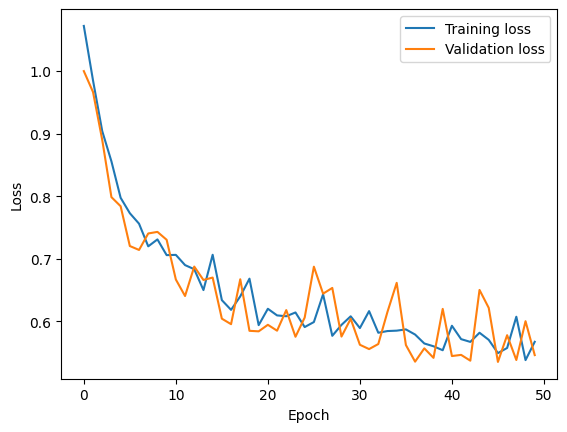

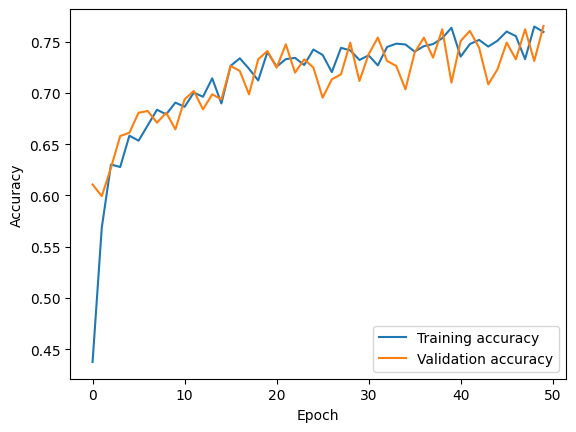

In [19]:
resnet_model = pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=INPUT,
                   pooling='max',classes=3,
                   weights='imagenet')

show_results(resnet_model, 50, 0.001, train_ds1, val_ds1)

### VGG19

In [20]:
# vgg19_model = tf.keras.applications.vgg19.VGG19(include_top=False,
#                    input_shape=INPUT,
#                    pooling='max',classes=3,
#                    weights='imagenet')

# show_results(vgg19_model, 30, 0.001, train_ds1, val_ds1)

### Mobilenet

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 1024)              3228864   
 onal)                                                           
                                                                 
 module_wrapper_6 (ModuleWr  (None, 1024)              0         
 apper)                                                          
                                                                 
 module_wrapper_7 (ModuleWr  (None, 128)               131200    
 apper)                                                          
                                                                 
 module_wrapper_8 (ModuleWr  (None, 32)                4128      
 apper)                                                          
                                                       

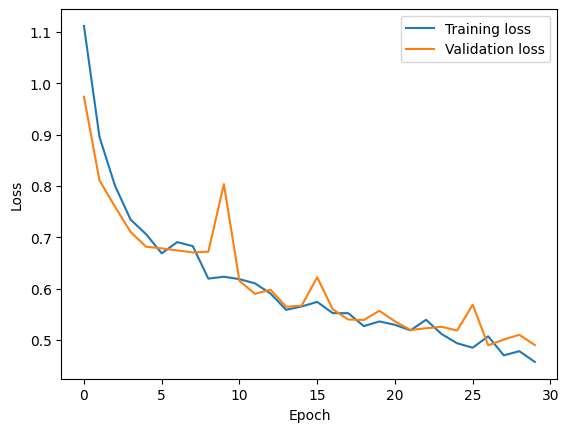

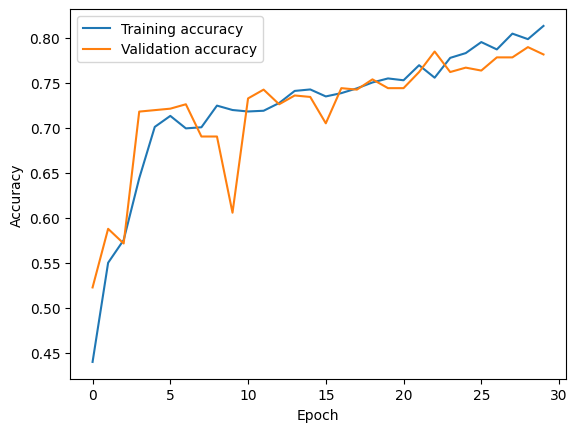

In [21]:
mobilenet_model = tf.keras.applications.mobilenet.MobileNet(include_top=False,
                   input_shape=INPUT,
                   pooling='max',classes=3,
                   weights='imagenet')

show_results(mobilenet_model, 30, 0.001, train_ds1, val_ds1)

### InceptionNet

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 module_wrapper_12 (ModuleW  (None, 2048)              0         
 rapper)                                                         
                                                                 
 module_wrapper_13 (ModuleW  (None, 128)               262272    
 rapper)                                                         
                                                                 
 module_wrapper_14 (ModuleW  (None, 32)                4128      
 rapper)                                                         
                                                                 
 module_wrapper_15 (ModuleW  (None, 8)                 

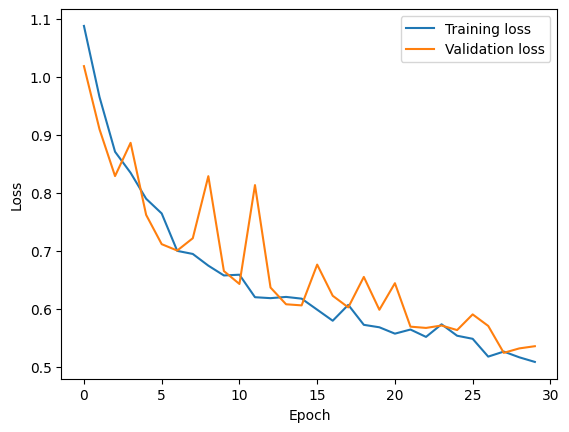

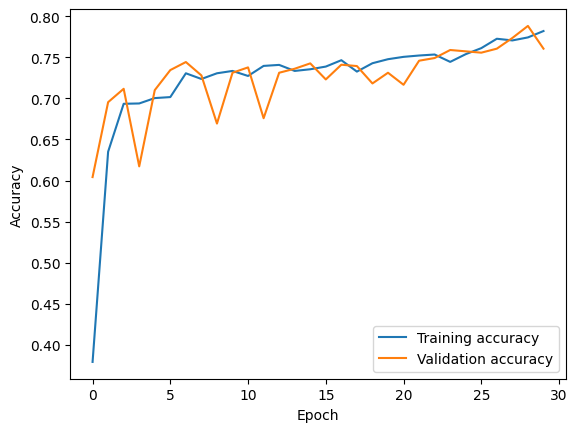

In [22]:
inceptionnet_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False,
                   input_shape=INPUT,
                   pooling='max',classes=3,
                   weights='imagenet')

show_results(inceptionnet_model, 30, 0.001, train_ds1, val_ds1)

### VGG16

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 module_wrapper_18 (ModuleW  (None, 512)               0         
 rapper)                                                         
                                                                 
 module_wrapper_19 (ModuleW  (None, 128)               65664     
 rapper)                                                         
                                                                 
 module_wrapper_20 (ModuleW  (None, 32)                4128      
 rapper)                                                         
                                                                 
 module_wrapper_21 (ModuleW  (None, 8)                 

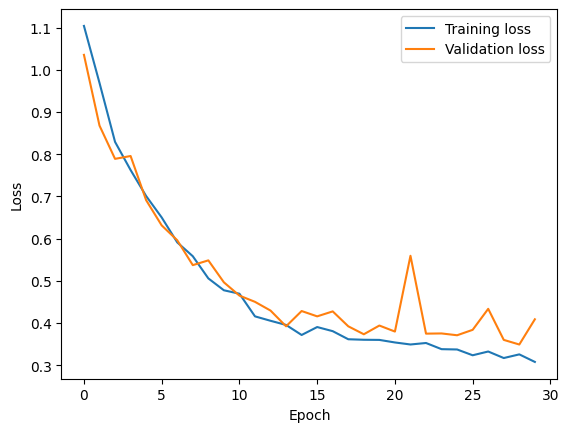

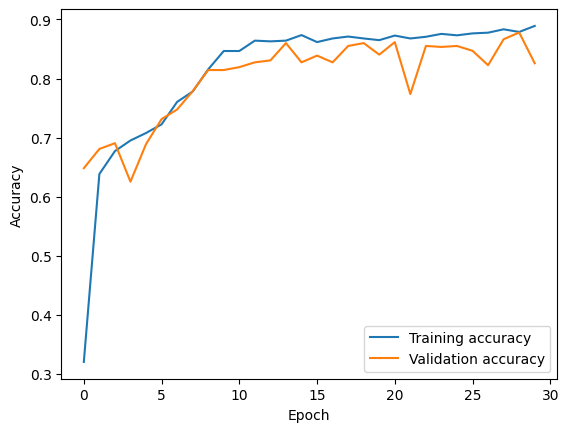

In [23]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False,
                   input_shape=INPUT,
                   pooling='max',classes=3,
                   weights='imagenet')

show_results(vgg16_model, 30, 0.001, train_ds1, val_ds1)

### XceptionNet

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 module_wrapper_24 (ModuleW  (None, 2048)              0         
 rapper)                                                         
                                                                 
 module_wrapper_25 (ModuleW  (None, 128)               262272    
 rapper)                                                         
                                                                 
 module_wrapper_26 (ModuleW  (None, 32)                4128      
 rapper)                                                         
                                                                 
 module_wrapper_27 (ModuleW  (None, 8)                 

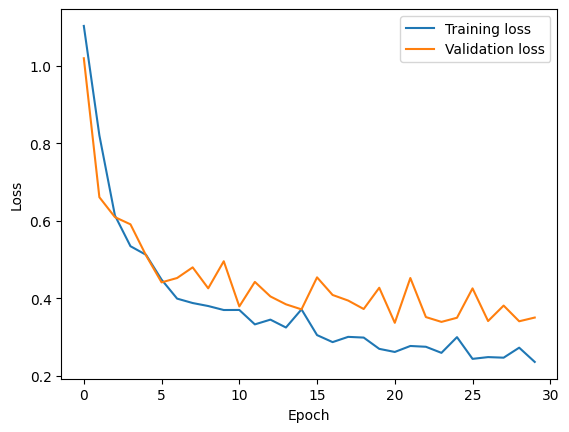

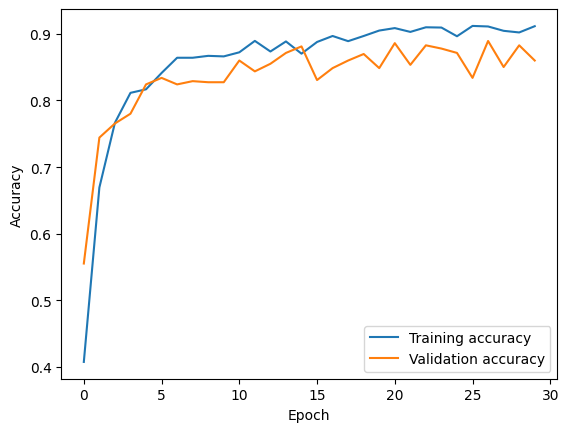

In [24]:
xception_model = tf.keras.applications.xception.Xception(include_top=False,
                   input_shape=INPUT,
                   pooling='max',classes=3,
                   weights='imagenet')

show_results(xception_model, 30, 0.001, train_ds1, val_ds1)

### Resnet152

234698864/234698864 [==============================] - 1s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 module_wrapper_30 (ModuleW  (None, 2048)              0         
 rapper)                                                         
                                                                 
 module_wrapper_31 (ModuleW  (None, 128)               262272    
 rapper)                                                         
                                                                 
 module_wrapper_32 (ModuleW  (None, 32)                4128      
 rapper)                                                         
                                                                 
 module_wrapper_33 (ModuleW  (None, 8)               

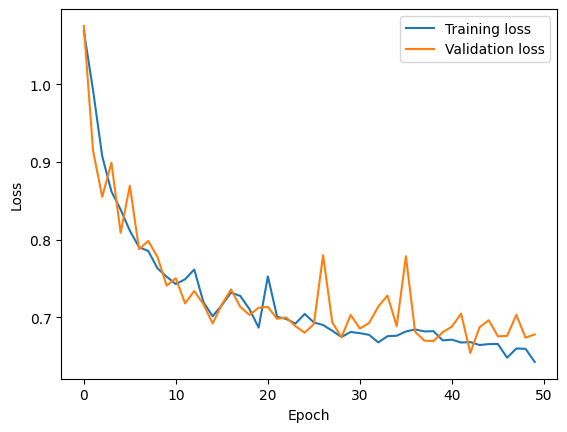

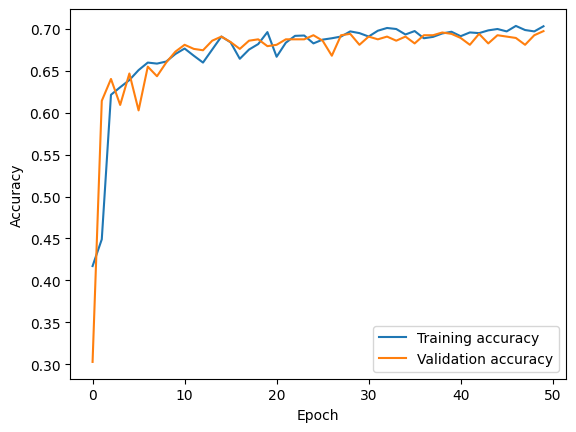

In [25]:
resnet152_model = tf.keras.applications.resnet.ResNet152(include_top=False,
                   input_shape=INPUT,
                   pooling='max',classes=3,
                   weights='imagenet')

show_results(resnet152_model, 50, 0.001, train_ds1, val_ds1)